## **EX 1 - Learning the data :)**

###### These are important imports

In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [35]:
sb.set(color_codes=True, rc={'figure.figsize': (10, 100)})

###### Reading the CSV file:

In [18]:
data_frame = pd.read_csv("./startup_dataset.csv")

Data information and examples of our data:

In [19]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   738 non-null    object 
 1   state_code           738 non-null    object 
 2   latitude             738 non-null    float64
 3   longitude            738 non-null    float64
 4   zip_code             738 non-null    object 
 5   city                 738 non-null    object 
 6   name                 738 non-null    object 
 7   foundation_date      738 non-null    object 
 8   first_funding_date   738 non-null    object 
 9   last_funding_date    738 non-null    object 
 10  first_funding_age    738 non-null    float64
 11  last_funding_age     738 non-null    float64
 12  first_milestone_age  609 non-null    float64
 13  last_milestone_age   609 non-null    float64
 14  connections          738 non-null    int64  
 15  funding_rounds       738 non-null    int

In [8]:
data_frame

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
0,c:6669,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,...,0,0,1,0,0,0,0,1.0000,0,acquired
1,c:16283,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,...,0,0,0,0,1,1,1,4.7500,1,acquired
2,c:65620,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,c:42668,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,c:65806,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,...,0,0,0,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,c:5988,CA,37.536402,-122.325129,94403,San Mateo,B-hive Networks,1/1/2005,8/25/2006,8/25/2006,...,0,0,0,1,0,0,0,2.0000,1,acquired
734,c:34549,NY,40.650104,-73.949582,11211,Brooklyn,Hot Potato,1/1/2009,11/25/2009,11/25/2009,...,0,0,1,1,0,0,0,16.0000,1,acquired
735,c:19538,WA,47.625740,-122.358162,98119,Seattle,Kashless,9/1/2008,10/29/2008,2/4/2011,...,0,0,0,1,0,0,0,1.0000,1,closed
736,c:29605,PA,40.245664,-74.845997,19067,Yardley,Three Screen Games,1/1/2009,10/7/2009,10/7/2009,...,0,0,0,0,0,0,0,1.0000,1,closed


In [22]:
data_frame.describe(include='all')

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
count,738,738,738.000000,738.000000,738,738,738,738,738,738,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738
unique,738,32,NaN,NaN,327,194,738,186,487,578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,c:6669,CA,NaN,NaN,94107,San Francisco,Bandsintown,1/1/2002,1/1/2007,1/1/2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,1,376,NaN,NaN,24,100,1,47,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470
mean,NaN,NaN,38.558655,-102.814267,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039295,0.002710,0.310298,0.513550,0.397019,0.231707,0.105691,2.795865,0.814363,NaN
std,NaN,NaN,3.669119,22.456789,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194429,0.052023,0.462929,0.500155,0.489612,0.422209,0.307650,1.828125,0.389077,NaN
min,NaN,NaN,26.052461,-122.756956,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,NaN,37.391580,-122.192169,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,NaN,NaN,37.779281,-118.287233,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.450000,1.000000,NaN
75%,NaN,NaN,40.730646,-76.850588,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,NaN


In [16]:
data_frame.describe(include='all', datetime_is_numeric=True)

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
count,738,738,738.000000,738.000000,738,738,738,738,738,738,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738
unique,738,32,NaN,NaN,327,194,738,186,487,578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,c:6669,CA,NaN,NaN,94107,San Francisco,Bandsintown,1/1/2002,1/1/2007,1/1/2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,1,376,NaN,NaN,24,100,1,47,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470
mean,NaN,NaN,38.558655,-102.814267,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039295,0.002710,0.310298,0.513550,0.397019,0.231707,0.105691,2.795865,0.814363,NaN
std,NaN,NaN,3.669119,22.456789,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194429,0.052023,0.462929,0.500155,0.489612,0.422209,0.307650,1.828125,0.389077,NaN
min,NaN,NaN,26.052461,-122.756956,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,NaN,37.391580,-122.192169,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,NaN,NaN,37.779281,-118.287233,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.450000,1.000000,NaN
75%,NaN,NaN,40.730646,-76.850588,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,NaN


#### Statistics of our data:

In [157]:
def print_stats(df: pd.DataFrame) -> None:
    for f in [pd.DataFrame.mean, pd.DataFrame.skew, pd.DataFrame.median, pd.DataFrame.std]:
        print(f"{f.__name__} = {f(df)}")
    print(f"mode = {df.mode()[0]}")

Text(0.5, 1.0, 'Count of state codes')

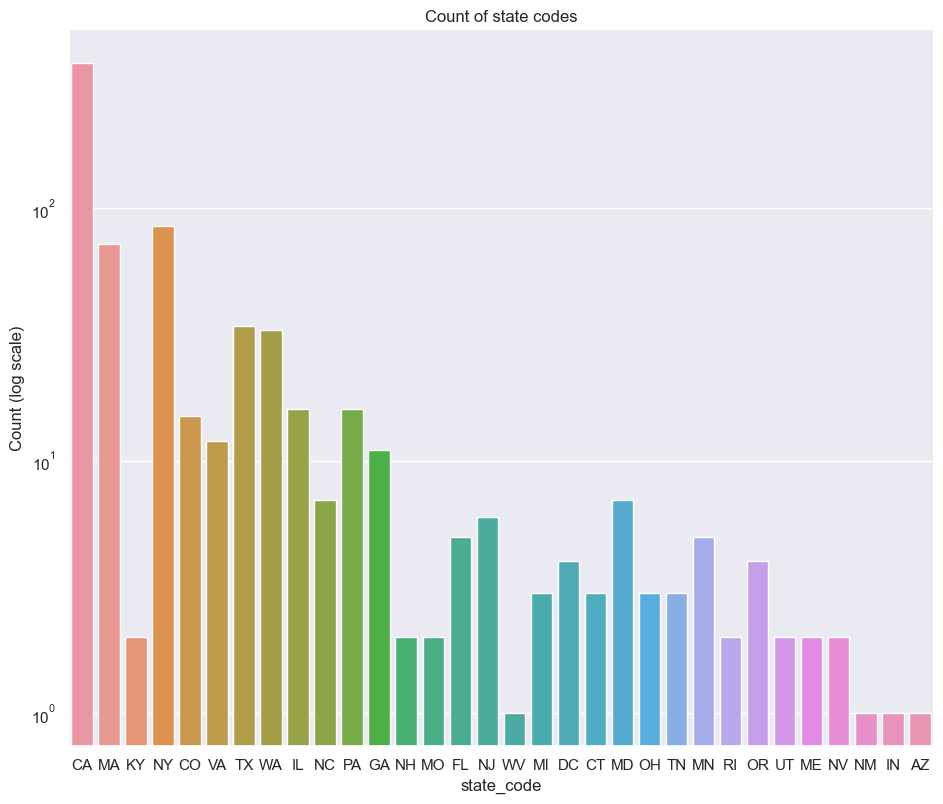

In [148]:
sb.catplot(x='state_code', kind='count', data=data_frame, height=8, aspect=1.2)
plt.yscale('log')  # printing in LOGARITHMIC SCALE
plt.ylabel('Count (log scale)')
plt.title('Count of state codes')

In [158]:
data_frame['state_code_codes'] = data_frame['state_code'].map({state: i for i, state in enumerate(data_frame['state_code'].unique())})
print_stats(data_frame['state_code_codes'])

# 0 in the MODE means CA, 1 means MA and etc.

mean = 3.4525745257452574
skew = 2.3270934893679924
median = 0.0
std = 5.8660812505448074
mode = 0


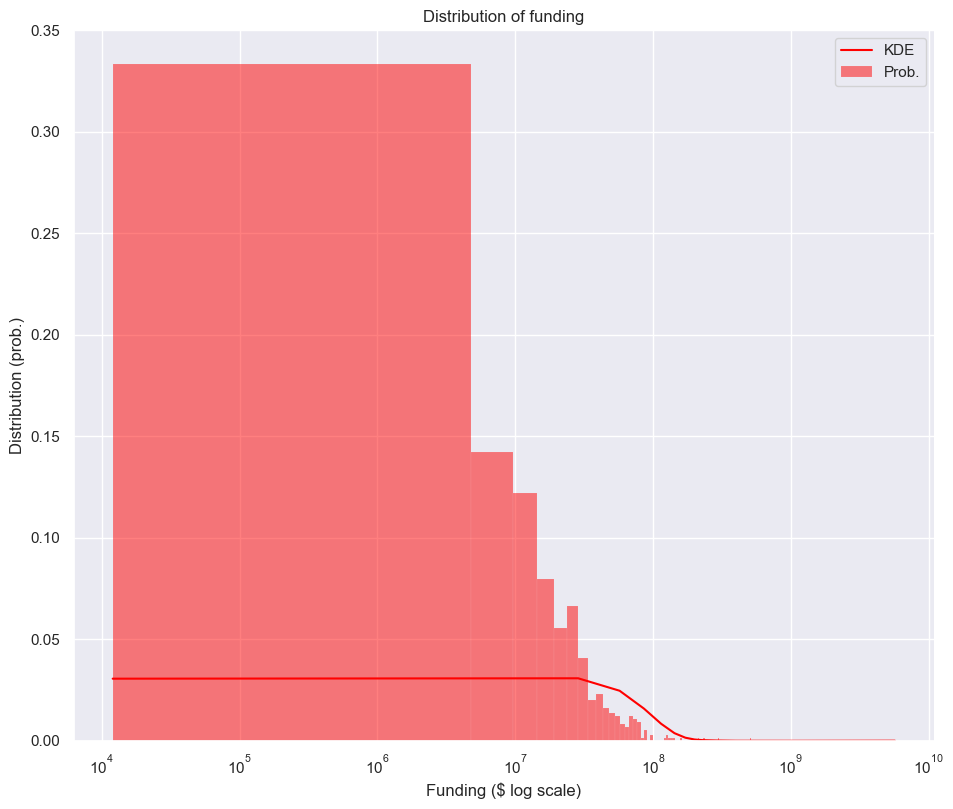

In [97]:
sb.displot(x='total_funding', kde=True,data=data_frame, height=8, aspect=1.2, color='red', stat="probability")
plt.xscale('log')  # printing in LOGARITHMIC SCALE
plt.xlabel('Funding ($ log scale)')
plt.ylabel('Distribution (prob.)')
plt.title('Distribution of funding')
plt.legend(["KDE", "Prob."])

In [159]:
print_stats(data_frame['total_funding'])

mean = 27381800.120596208
skew = 26.187512350847182
median = 10000000.0
std = 211732206.69525778
mode = 5000000


Text(0.5, 1.0, 'Count of connections')

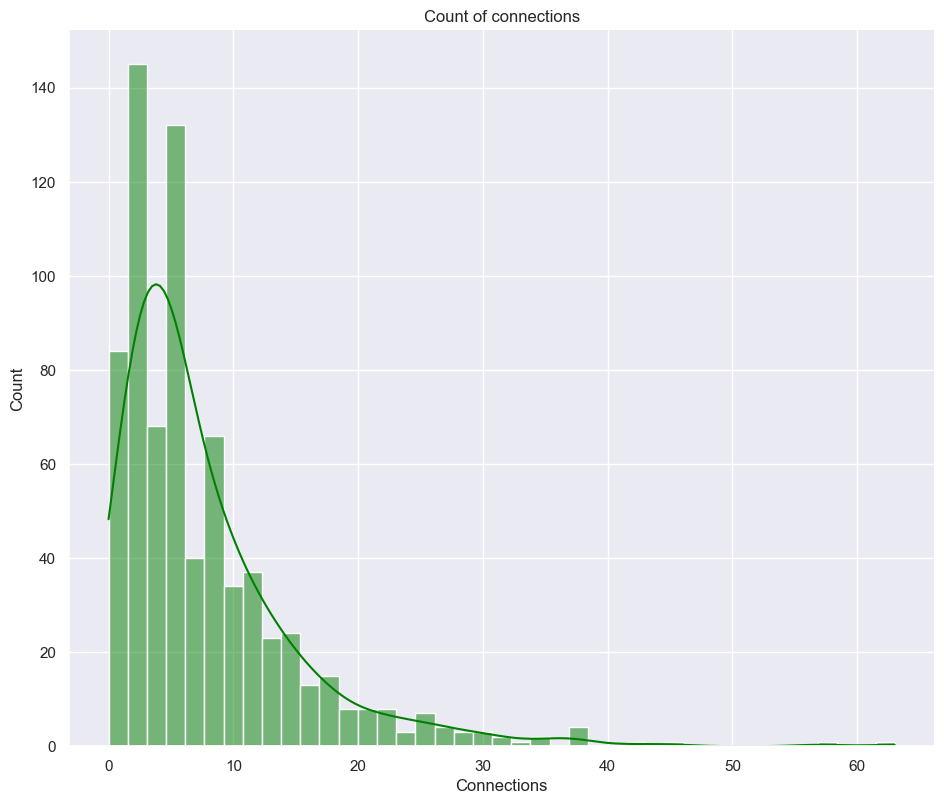

In [84]:
sb.displot(x='connections', kind='hist', kde=True, data=data_frame, height=8, aspect=1.2, color='green')
plt.xlabel('Connections')
plt.ylabel('Count')
plt.title('Count of connections')

Text(0.5, 1.0, 'Count of target thingy')

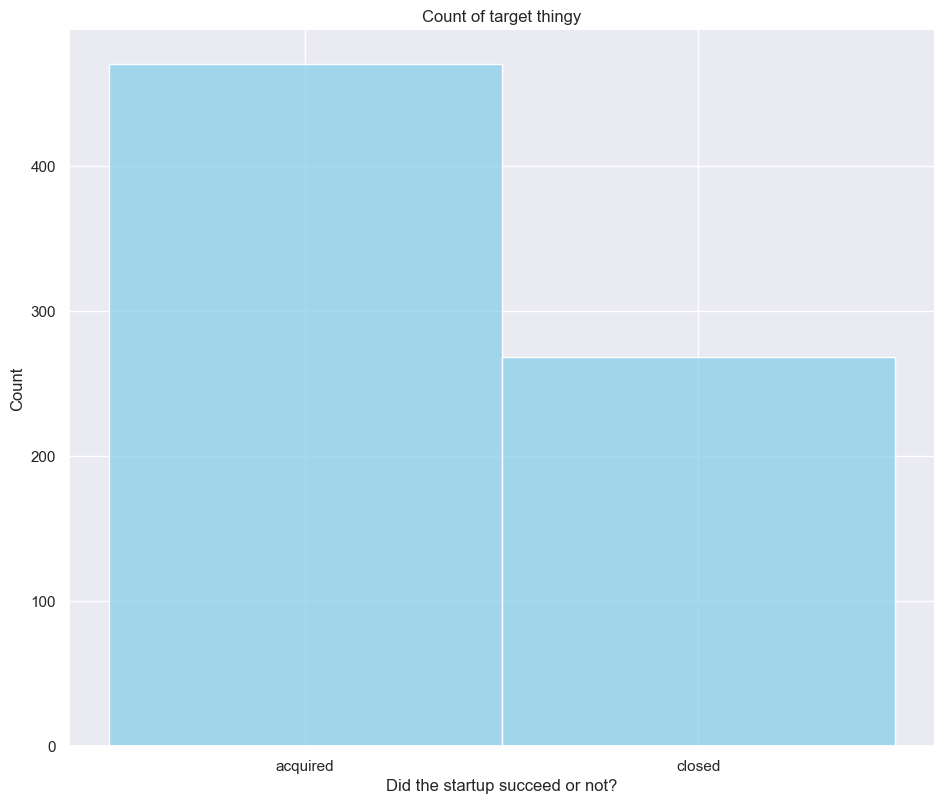

In [86]:
sb.displot(x='target', kind='hist', data=data_frame, height=8, aspect=1.2, color='skyblue')
plt.xlabel('Did the startup succeed or not?')
plt.ylabel('Count')
plt.title('Count of target thingy')

Coding the "Target" column to bytes

In [162]:
data_frame['target_codes'] = data_frame["Target"].map({'acquired': 1, 'closed': 0})
print_stats(data_frame["target_codes"])

# 1 in the MEAN means ACQUIRED

mean = 0.6368563685636857
skew = -0.5703207252379181
median = 1.0
std = 0.4812318921509238
mode = 1


Corraltions

In [170]:
df_correlations = data_frame.corr(numeric_only=True)
df_correlations

,latitude,longitude,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,connections,funding_rounds,total_funding,milestones,...,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,target_codes,state_code_codes
latitude,1.000000,0.362387,-0.057213,-0.061956,-0.076824,-0.062787,-0.050513,-0.006982,-0.085235,0.002742,...,-0.008433,-0.046363,-0.035337,-0.025101,-0.066926,-0.045475,-0.020249,0.048904,0.037893,0.206245
longitude,0.362387,1.000000,-0.002254,-0.005137,-0.053508,-0.085123,-0.073691,0.015995,0.020158,-0.008864,...,0.019537,-0.042443,-0.064639,-0.082009,-0.061214,-0.064926,-0.035647,-0.094226,-0.022468,0.405969
first_funding_age,-0.057213,-0.002254,1.000000,0.766039,0.594749,0.483144,-0.183358,-0.160621,0.046359,-0.280827,...,0.004868,0.089775,-0.281353,-0.044321,0.026658,0.100231,0.118929,0.050020,-0.059797,0.039446
last_funding_age,-0.061956,-0.005137,0.766039,1.000000,0.688097,0.637672,0.077883,0.373669,0.116076,-0.097969,...,0.033219,0.057309,-0.104159,0.275057,0.300999,0.316371,0.140070,0.191046,0.076505,-0.020978
first_milestone_age,-0.076824,-0.053508,0.594749,0.688097,1.000000,0.779016,0.255279,0.181870,0.062544,-0.030350,...,0.069929,0.020669,0.014750,0.210068,0.198835,0.258259,0.063160,0.167591,0.175999,-0.048946
last_milestone_age,-0.062787,-0.085123,0.483144,0.637672,0.779016,1.000000,0.366169,0.250927,0.094482,0.358309,...,0.051741,-0.015349,0.095117,0.278399,0.273729,0.256766,0.092565,0.211758,0.285837,-0.077549
connections,-0.050513,-0.073691,-0.183358,0.077883,0.255279,0.366169,1.000000,0.361143,0.096143,0.528465,...,0.131509,-0.079162,0.313651,0.296837,0.261875,0.233105,0.110219,0.230391,0.354304,-0.137671
funding_rounds,-0.006982,0.015995,-0.160621,0.373669,0.181870,0.250927,0.361143,1.000000,0.114936,0.247676,...,0.007193,-0.036626,0.241887,0.456517,0.431580,0.350841,0.057083,0.255254,0.190803,-0.081839
total_funding,-0.085235,0.020158,0.046359,0.116076,0.062544,0.094482,0.096143,0.114936,1.000000,0.014881,...,-0.002003,-0.017400,-0.029167,0.011717,0.035971,0.039217,0.050530,0.047372,0.040964,0.019727
milestones,0.002742,-0.008864,-0.280827,-0.097969,-0.030350,0.358309,0.528465,0.247676,0.014881,1.000000,...,0.045241,-0.135240,0.326341,0.204771,0.092869,0.033402,0.039267,0.180523,0.335855,-0.150524


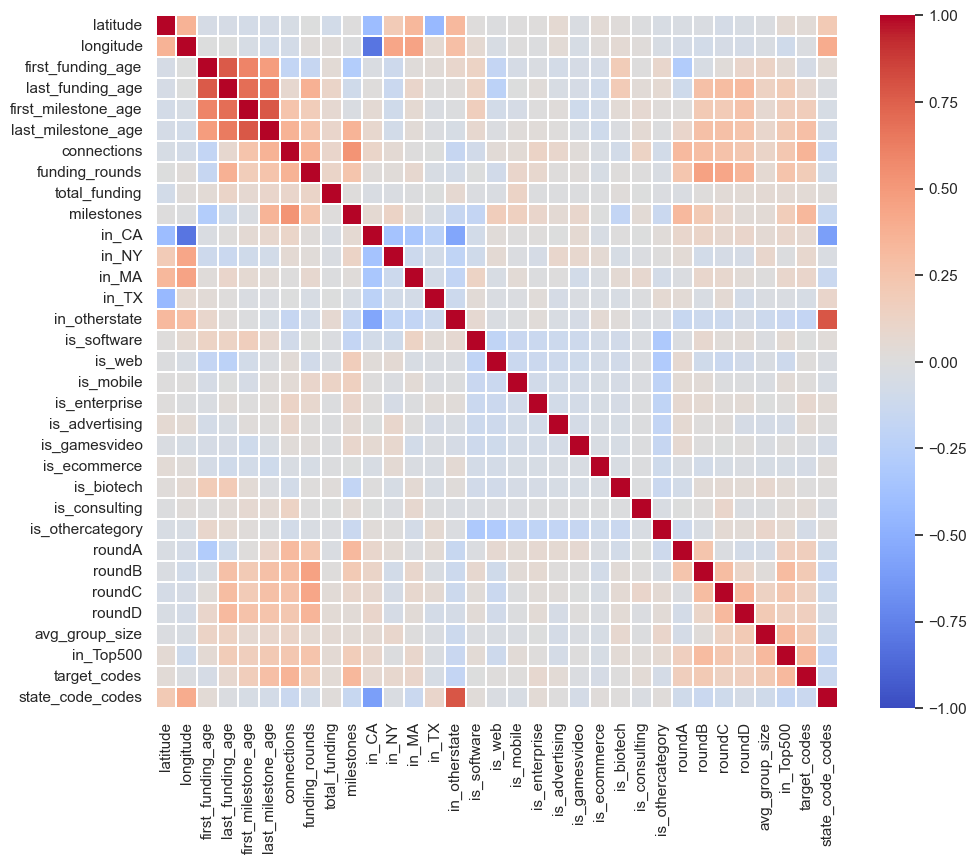

In [183]:
f, ax = plt.subplots(figsize=(11, 9))
ax = sb.heatmap(df_correlations, annot=False, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=0.01, linecolor='white')